In [1]:
using Ising,Gadfly,DataFrames,LaTeXStrings

#Modelo de Ising en tres dimensiones
###Christian Ladrón de Guevara

Lo primero es crear un ensamble

In [ ]:
ensamble = Ensamble((10,10,10),1/2.0)

Ajustar sus parámetros y ejecutar unos pasos, el resultado es un *diccionario* con los valores de *Magnetización total* y *Energía*.

In [49]:
ensamble.β=1/2.0
correSweeps(ensamble,800)

Dict{Any,Any} with 2 entries:
  "M" => [972.0,984.0,994.0,996.0,994.0,992.0,994.0,992.0,988.0,986.0,990.0,996…
  "E" => [-2848.0,-2904.0,-2964.0,-2976.0,-2968.0,-2952.0,-2964.0,-2952.0,-2936…

In [60]:
Ls=[8:3:17]
df=Array(Any,length(Ls))
for i in 1:length(Ls)
    resultados = open("resultadosSinCampo"*string(Ls[i])*".serial")
    resultadoDeserializado=deserialize(resultados)
    close(resultados)
    resultadoDiccionario=Dict{ASCIIString,Any}(resultadoDeserializado)
    df[i]=DataFrame(t=resultadoDiccionario["Ts"],M=reshape(resultadoDiccionario["Magnetizaciones"][1,:],length(resultadoDiccionario["Ts"])),
    L=string(resultadoDiccionario["Ls"][1])* "^3")
end
df = vcat(df...);
set_default_plot_size(24cm, 16cm)

##Modelo de Ising 3D sin campo Magnético
Prepara muchas ejecuciones, se barren las temperaturas entre 3.5 y 4.7 en pasos de 0.012, para sistemas de tamaños 8x8x8, 11x11x11,14x14x14 y 17x17x17.

De los datos obtenidos de cada simulación se calcula la *magnetización por espín* y el *calor específico*


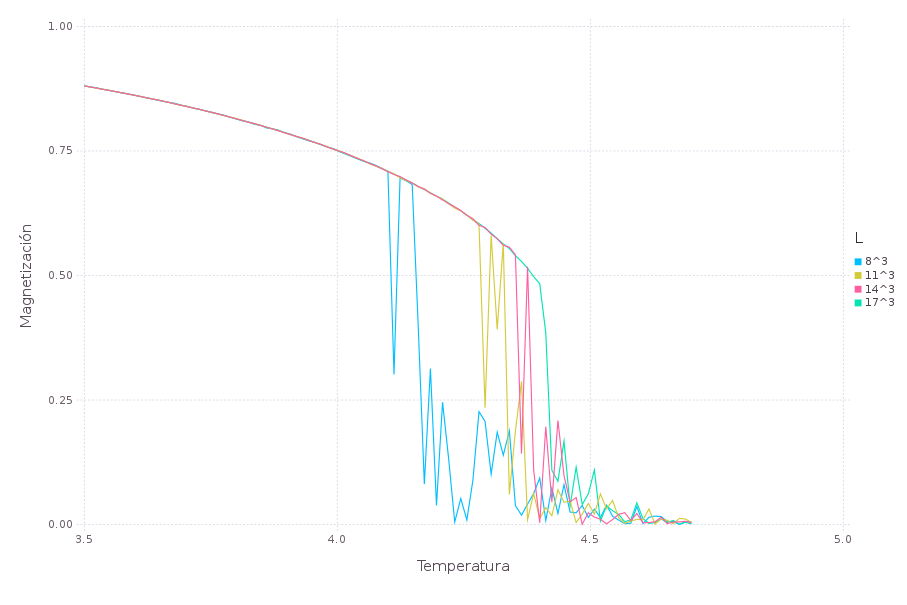

In [61]:
elplot=plot(df,x="t",y="M",color="L",Geom.line,Scale.color_discrete,Guide.xlabel("Temperatura"),Guide.ylabel("Magnetización"))

In [64]:
Ls=[8:3:17]
df=Array(Any,length(Ls))
for i in 1:length(Ls)
    resultados = open("resultadosSinCampo"*string(Ls[i])*".serial")
    resultadoDeserializado=deserialize(resultados)
    close(resultados)
    resultadoDiccionario=Dict{ASCIIString,Any}(resultadoDeserializado)
    df[i]=DataFrame(t=resultadoDiccionario["Ts"],M=reshape(resultadoDiccionario["calores"][1,:],length(resultadoDiccionario["Ts"])),
    L=string(resultadoDiccionario["Ls"][1])* "^3")
end
df = vcat(df...);

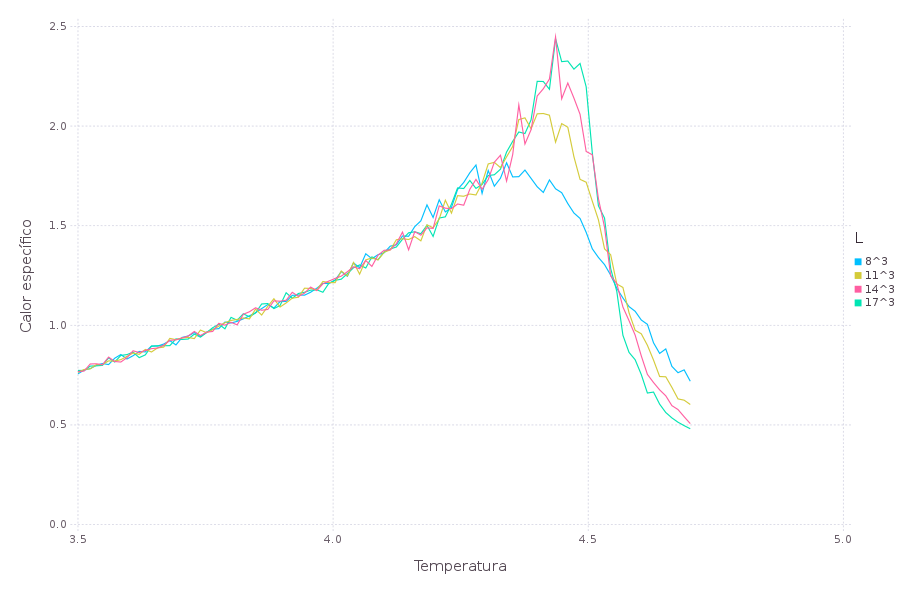

In [65]:
elplot=plot(df,x="t",y="M",color="L",Geom.line,Scale.color_discrete,Guide.xlabel("Temperatura"),Guide.ylabel("Calor específico"))

##Modelo de Ising 3D con campo Magnético
Prepara muchas ejecuciones, se barren las temperaturas entre 2.0 y 8.0 en pasos de 0.4, para sistemas de tamaños 5x5x5,9x9x9,13x13x13 y 17x17x17.

Se define el valor de el campo magnético en el campo *H* del objeto tipo *Ensamble*

De los datos obtenidos de cada simulación se calcula la *magnetización por espín* y el *calor específico*


In [101]:
Ts = [2.0:0.05:9.0]
Ls = 5:4:17
Magnetizaciones = zeros(length(Ls),length(Ts))
calores = zeros(length(Ls),length(Ts))
ensamble.H = 1                                           #se define campo magnético distinto de 0
for i in 1:length(Ls)
    ensamble.configuración = fill(1,(Ls[i],Ls[i],Ls[i]))
    ensamble.β=1/2.0
correSweeps(ensamble,1000)
for T in 1:length(Ts)
    ensamble.β = 1/Ts[T];
 mediciones = correSweeps(ensamble,3000)
Ms = medicionesIndependientes(mediciones["M"],5)
Es = medicionesIndependientes(mediciones["E"],5)
M = mean(Ms)/length(ensamble.configuración)
c = var(Es) * ensamble.β^2 / length(ensamble.configuración)
        Magnetizaciones[i,T] = M
        calores[i,T] = c
end
end

In [66]:
m = open("resultadosConCampo.serial")
n=deserialize(m)
close(m)
d=Dict{ASCIIString,Any}(n)
df=Array(Any,length(d["Ls"]))
for i in 1:length(d["Ls"])
    df[i]=DataFrame(t=d["Ts"],M=reshape(d["Magnetizaciones"][i,:],length(d["Ts"])),L=d["Ls"][i])
end
df = vcat(df...);

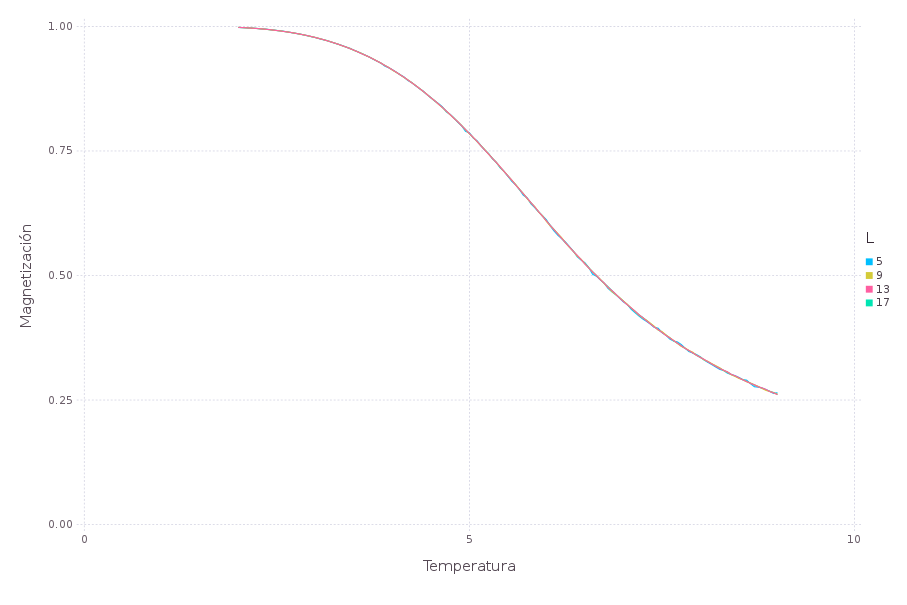

In [67]:
elplot=plot(df,x="t",y="M",color="L",Geom.line,Scale.color_discrete,Guide.xlabel("Temperatura"),Guide.ylabel("Magnetización"))

In [68]:
m = open("resultadosConCampo.serial")
n=deserialize(m)
close(m)
d=Dict{ASCIIString,Any}(n)
df=Array(Any,length(d["Ls"]))
for i in 1:length(d["Ls"])
    df[i]=DataFrame(t=d["Ts"],M=reshape(d["calores"][i,:],length(d["Ts"])),L=d["Ls"][i])
end
df = vcat(df...);

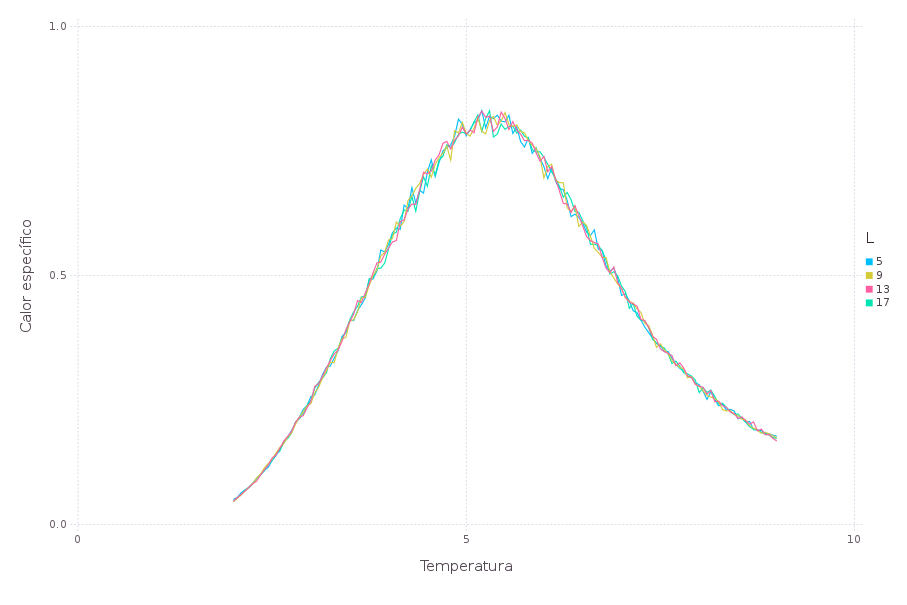

In [69]:
elplot=plot(df,x="t",y="M",color="L",Geom.line,Scale.color_discrete,Guide.xlabel("Temperatura"),Guide.ylabel("Calor específico"))

#Magnetización vs Sweeps

In [70]:
ensamble = Ensamble((10,10,10),0.5)
Hs = 1.05:0.075:1.65
sweeps = 900
ensamble.β = 0.5
function magnetos(ensamble::Ensamble,Hs::Array{Float64},sweeps::Integer)
    Ms = zeros(length(Hs),int(sweeps/10))
  for H in 1:length(Hs)
        ensamble.H = Hs[H]
        ensamble.configuración = -1 * ones(17,17,17)
      for i in 1:sweeps/10
            Ms[H,i] = magnetizaciónensamble(ensamble)/length(ensamble.configuración)
            correSweeps(ensamble,10)
      end
  end
    return Ms
end
Ms = magnetos(ensamble,[Hs],sweeps)
dfs = DataFrame[]
for i in 1:size(Ms)[1]
    df = DataFrame(sweeps=[10*(1:size(Ms)[2])],M=reshape(Ms[i,:],size(Ms)[2]),H=Hs[i])
    push!(dfs,df)
end
datos = vcat(dfs);

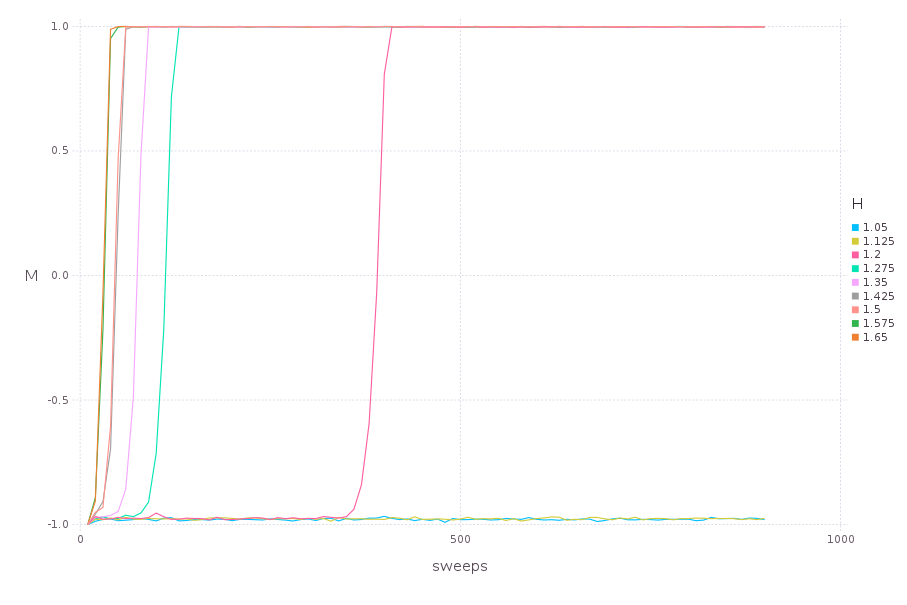

In [71]:
plot(datos,x="sweeps",y="M",color="H",Geom.line,Scale.color_discrete)

#Visualización 3D

In [ ]:
a = Ensamble((17,17,17),0.5)
a.H=1.3
a.configuración= -1*ones(17,17,17);
microestado=reshape(a.configuración,length(a.configuración));
ar = open("pruebasAnima.dat","w")
for i in 1:370
    correSweeps(a,1)
    write(ar,string(microestado))
    write(ar,'\n')
end
close(ar)
#Para crear el video se ejecuta
#python cubo.py
#rm imagenesVideo/Ising3D.webm
#ffmpeg -framerate 5 -i imagenesVideo/frame%06d.png -c:v libvpx imagenesVideo/Ising3D.webm

In [56]:
vid = open("imagenesVideo/Ising3D.webm","r")
vide = readbytes(vid)
vide64=base64(vide)
close(vid)

Simulación de un sistema de 17$^3$ con un campo *H=1.35*

In [57]:
display("text/html","<video controls> <source type=\"video/webm\" src=\"data:video/webm;base64,"*string(vide64)*"\"> </video>")

<source type="video/webm" src="data:video/webm;base64,GkXfowEAAAAAAAAfQoaBAUL3gQFC8oEEQvOBCEKChHdlYm1Ch4ECQoWBAhhTgGcBAAAAAAwZWRFNm3RALU27i1OrhBVJqWZTrIHfTbuMU6uEFlSua1OsggEuTbuNU6uEHFO7a1OsgwwZKewBAAAAAAAAowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVSalmAQAAAAAAAEMq17GDD0JATYCMTGF2ZjU2LjQuMTAxV0GMTGF2ZjU2LjQuMTAxc6SQHcHUytrCARZCDSNAWSWI70SJiEDgHQAAAAAAFlSuawEAAAAAAAA9rgEAAAAAAAA014EBc8WBAZyBACK1nIN1bmSGhVZfVlA4g4EBI+ODhAvrwgDgAQAAAAAAAAiwggKAuoIB4B9DtnUBAAAAAAIF7ueBAKNj84EAAICQ0wCdASqAAuABAAcIhYWIhYSIAgO3GsE2u/4G7V3HU/2L8fPzN+ceu/0v7+f27/u/5/5h+UXUP+z9BfxH8h/wf9W/yH+w/uv/7+qnpj/NP+49wH9Hv6//b/8J/m/8N/+fm7/SX4A/1L/ef272A/xz+c/6H+4fut8p3+o/y/+K93H9v/vP+x/wHwA/1H+9ffJ823/L9ij9y/YC/mH9Z/435//LD/tf/d/mPgi/Zr/1/6D9//oH/lv9X/4H5wfv////0B/gPoA/+r1Aeuu60/5N+wvYG9t+lC9J98v2n945MeAL+Q/yX/H/mD6EOj4oB/Lv6H/vvSd+M85fEB/U3zC/0/hM/T/9d7AP849F3+m/8H+V/Mv2cfT//v/1fwBfzf+t/9v1sP//7h/3T9kv9u5jmTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTzocyH+f3RPEvtTz0/LGlTz0/LGlTz0/LAwB+SwfYKMGCnyBHdToFlt47e5DG2yRmjmdP4c+5hwQ73y36UFPPT8saVPPT8saNgjcmK2u9g6Kd6AQ8tLjrjLIB55+AtX/14KFvGjl0r0HUGFJmLQz6IK+JQetAnVbAbq+hlLD39o5gmWNKnnp+WNKnnoIPu6rLD/+ADV0SaIADisL6d2kztEXg6os51+7isPq+8G/vIACn1lAk4hNzNdf6QXvMFkVyHk89PyxpU89Pywfccs7D51OPL9ekfjknAU2zulnS+RkUCa5r27myinr79QCYvefJyD0CdgG6pvXbgB4pEQAtKwpdiGU/W1Sc0RxgiWJGbP8NVBTz0/LGlTz07mMj9d/r/RQTBv2urbT21TNbgm0nRkO9ea7c9IjOjQQAEb/TJNxX4wbc/4tlZ8vjFwe1lTNKCnnp+WBPOWJ+fV644l7C3Sq0wxUoDI5eR3QUmLV00FKy3N6siHF8kNE8gHysFmITpWbJsMGEmWcKmpknICz9NvhXS86BwKh7WVM0oKeIDF/NtVU1YWcXQfVR8AM64dMpACIWdjWSQSK5F4JrQCdcjCv+45QnAwYMgwyuhhHb/M/32txN7ntUzSgp56fljSp4ntP1Npjkh7HONISDG4KC+iLQaNP+xTmI13MFuGIF+vKxcZ8URPH3ls6DyIjHhZR2FyrOxxikmAO4YdW+ZpQU89PyxpU89BmP1Ua5C+UBMr+P+kN/adQimXHv6+2xq8gZKbCaDsneuRzSI57QpLRjnn5bJirVvAm6lR+clD5D8Cn9jq2ln63BtEI43eBUPaypmlBTz0IrxXs6MAfZ6OfE7RdBRG5q0mcvjchxY705FU84NWbOCgbkgD6yoIzsJzkDcA3jPccKHRmtLAhX/awIuEjuioe1lTNKCnnp9yMG8K21MxQLvjM2/h+EbU8bJgSXR9Hht7ElCzFuvtGcbGr2uz1Kq89Peeoo7EgIByM8wp/NiaZgs5m5Lst8Coe1lTNKCnnp9xXDC7Vh4DMF6iXzBrXsAoFLJJltQpI3xGCUAuJxFTko8uRDqK9CiqTaFKj4Ql5PAFwQUuxiJciNVlTNKCnnp+WNKnig/hAhD6SYfAnQ+EgPxAdc39CeJ4+USDHrZSj6ciXu51VIJJsfVbnApIuFBRvCPf/MBv7kfdhPtYgqeTp+rNadOiF1LVxpQ160yaIaOzZ0NL0Xg8d56fljSp56flgQSAWCglzkzJDbLCVR8P1UIEEx4JYjR5rumS8Rt8YNiu7bmKgKhnp2sfAAKZCA0IEaAjF8qpQU89PyxpU89PyxjK83UnJCG6o1CJ4b1bLjmKBWP5njbZXdvR52S7zM534VLxC5kViNFcr4TYjqqTcRAbG8saVPPT8saVPPT8sYrARSkizCCX8zgnEOtGEkTlVhNTIyW0DnObP08NN7C1DjtgFoWL/7c7EvYePGaUFPPT8saVPPT8sGmVkEdpjOX/xt3E/+Ws8VnQMPSIfYwdE/O89PyxpU89PyxpU89Pyxo5Pq0Y9ZqH58PvApTp+WNKnnp+WNKnnp+WNKnnoOMpBG+RzjxmlBTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTz0/LGlTzoA/v+rUIdt1aaH5OT2HkytCey/bltkJwYCm4x/cjw71fdoW3HIRrfCTACRhcUTe/YQL3HMwUhe4MuP888WzLRYCyvTy6662g9x0onWzT9AOAgcNBlNPoGyTIyv315Y74CVpX59J7H24FenAvkJtJy/9yl8qn/86xonvsGV+sWFBCTMS34YBCG8+gBQvjF+BQ9RTNxsGMUmQCFThHlGxR0ogsgnuakgJdWAFGs8xp3zpfKo4qv/+0FnP8Ni4Yv917FuDNNqBAcaUpraAnc9oAcYBkoL4jlXeYLoMC0z7klQMXwSlVNQWG2+Ll2DG8MjY09hnpmf92EbQe/Qfv+l/zw5feN+b3oToeVoeYXp3VwypAfjtejty3evSbuHS7crjw+Ntc8Pv4Zrt1ksmbnWg6sfojQXSbYjx/rLAhV2IUgdmUuyUuf/ZKr5HNpF+gPhchIpgfPlTjG6nHY1rTM5b6x+rVh/XGFZIG2IIDl4WzNmSXqwbhel/vUa8+gISrDqlO/IsYSArQJBP5luN7HNWl2ZlOJ/4T+aUBwfUxFOMf2V+HDGmqEYq9mNk3Nr437IEkopNkMitXAhJhSK3ITqLx2PKOueTdCHhAIBQaK6hf/14gygNwoi4yhj0TVfZt+4yAIsm/iF71gWRrnY6jSKltpuQygKDv72XcdDq8j/ruOuqSanWMGn21rJyClpZssBauOxNfko+6/VXa5fwcR28gPCjOztkxVvSKG+GF5xncQaDBdiyQIi82oi4ob5SA4YTTLOUhDbQedfz6uOTkajJUTYDUHkMV6wHihL2kTVmSuRtt/zLlvT67BF1YxNmLXT2r5IRHrCEq/zkpildc36hyZyppdWDjoWonk7RfMJPG3avmJ4eblTcRQoUkw6ntb0CYmiCrGupTkybVHJYTbIV6bE+vWuyqZ1/mlAcxQ+oCWhQ//GBOuvcMeTLdZzkzgRNLDsLI8RkiIVzmyTPhpxTJhKc57yMgptD5x/tdUv6HkcKV2+nCwBjHPDkB1p2L7JUi6EBOK4GDi6fXV1wdAiaNpUjtiugiXDK5WRwvN4H6EQbnYv49A5YY

https://github.com/christianladron/